# Configuración del entorno de trabajo

En este notebook realizamos un análisis **exploratorio de los datos (EDA: en inglés Exploratory Data Analysis)**. Este proceso es el que se utiliza para evaluar los datos disponibles y generar un conocimiento general del comportamiento de las variables del problema.


Lo primero que necesitamos instalar son librerías de análisis de datos como **pandas** y **numpy**, y librerías de visualización (elegiremos **matplotlib** y **seaborn**). En este notebook utilizaremos el dataset "iris", en su versión ofrecida por Seaborn, que es un dataset histórico en la ciencia de datos.

<img src="img/iris.jpeg" width=700>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Introducción al Análisis Exploratorio

Es fundamental cargar, explorar y entender los datos, su calidad y su comportamiento **antes** de empezar a trabajar con ellos. Este proceso es necesario para tener una aproximación a los datos y debemos hacerlo antes de realizar cualquier análisis. Además, debemos conocer el comportamiento de los datos porque **muchas de las técnicas estadísticas de análisis de datos presuponen el cumplimiento de unas condiciones previas**, como **normalidad**, **no colinearidad** y **escalas comparables** para poder garantizar el funcionamiento correcto de las técnicas.

La definición formal de este análisis exploratorio de los datos es: el conjunto de técnicas estadísticas cuyo objetivo es explorar, describir y resumir la naturaleza de los datos y comprender las relaciones existentes entre las variables de interés, maximizando la comprensión del conjunto de datos.

# Análisis Exploratorio de los datos:

# 1) Importando los datos

Seguiremos los pasos que ya hemos visto en anteriores ejemplos de análisis exploratorio. 
- Lo primero que haremos es cargar el dataset que, en esta ocasión, obtenemos directamente del paquete Seaborn.
- A continuación, procedemos a visualizar los primeros datos que nos ofrece este dataset utilizando la función **.head()**.

In [3]:
# Carga del dataset
df = sns.load_dataset("iris")
# Visualización de los primeros "registros"
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 2) Limpieza de Datos

Una vez que hemos cargado los datos y hemos verificado su integridad, pasamos a la limpieza. Ahora revisaremos el formato de los datos, los tipos de datos que tenemos, los valores nulos y haremos un comentario sobre los valores duplicados.

### 2.1) Tipos de datos

Ahora nos interesa familiarizarnos con los tipos de datos de nuestro dataset. Esto sucede por dos motivos, el primero es que nos interesa saber si estamos tratando con texto, valores numéricos, categóricos, números enteros, decimales, y sus medidas estadísticas centrales y de dispersión. Básicamente queremos un resumen matemático de alto nivel sobre los principales estadísticos de nuestro dataset.

Si utilizamos el método **.dtypes** sobre el DataFrame veremos que todos los valores de las columnas son numéricos, menos el de la clase que queremos predecir (llamado **species**) que es del tipo string. Pandas llama al tipo string como object, por eso veremos el valor object en la última línea.

In [4]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Cuando verificamos el tipo de datos, también suele ser útil verificar el tamaño del Dataset. El dataset es una tabla, por lo que tiene una cantidad de registros igual a la cantidad de filas y una cantidad de variables igual a la cantidad de columnas. El atributo .shape del DataFrame nos permite saber el tamaño del DataFrame. Lo devuelve como una tupla de la forma: ("número de filas", "número de columnas")

In [5]:
print(df.shape)
print(type(df.shape))

(150, 5)
<class 'tuple'>


Si queremos saber los valores 'únicos' que aparecen en una de las columnas (en este caso la que contiene el nombre de la especie), de manera que podamos conocer cuantos tipos de especies se contempla en el dataset, ejecutaremos la función de numpy **.unique()** de la siguiente forma:

In [6]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

#### Realizamos el split de los datos

Ahora que sabemos la cantidad de datos que tenemos, haremos un split entre datos de entrenamiento y de test.

¿Por qué hacerlo a esta altura y no al finalizar el EDA? 
Para asegurarnos de no contaminar nuestro criterio. Al hacer este proceso con los datos con los que se va a entrenar el modelo, se pretende ir descubriendo relaciones en el dataset con la misma información disponible que tendrá el modelo.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['species'])

### 2.2) Valores nulos

Ahora queremos ver si el dataset tiene valores nulos y qué hacer con ellos en caso de que los tenga. Vemos que este dataset no tiene valores nulos con los métodos que se enseñan debajo, pero en caso de que te interese ver cómo podemos atacar valores nulos, al final del notebook hay algunas ideas de cómo se suelen tratar en la práctica, y algunas ideas para imputarlos, en caso de que quieras hacerlo.

In [9]:
# Una forma de comprobar valores nulos: la función .info() 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 56 to 145
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  120 non-null    float64
 1   sepal_width   120 non-null    float64
 2   petal_length  120 non-null    float64
 3   petal_width   120 non-null    float64
 4   species       120 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.6+ KB


In [10]:
# Otra manera de comprobar nulos: usando el método isna() y recorriendo las columnas del dataset
for column in df_train.columns:
    num_nulls = df_train[column].isna().sum()
    print(f'Column "{column}" has {num_nulls} nulls')

Column "sepal_length" has 0 nulls
Column "sepal_width" has 0 nulls
Column "petal_length" has 0 nulls
Column "petal_width" has 0 nulls
Column "species" has 0 nulls


### 2.3) Valores duplicados

En este caso, los valores duplicados no nos interesan por **dos razones**.  
- La primera es porque sabemos que el dataset no contiene valores duplicados que no deban tenerse en cuenta para el análisis. Esto en la práctica no lo sabríamos, pero como es un dataset clásico esta información es conocida. 
- La segunda es que si miramos el tamaño de nuestro dataset, tenemos solamente 150 registros, por lo que si eliminamos duplicados corremos el riesgo de no poder realizar un análisis suficiente con los datos que nos queden.

Aún así, para comprobar cómo podríamos realizar esta parte del EDA, se mostrará debajo a pesar de que no se realizarán cambios reales sobre el DataFrame.

Primero buscaremos los valores repetidos en el dataframe.  
Esto podemos hacerlo con el método **.duplicated()**. Este método devuelve una serie de True/False que tiene True en la posición donde hay un duplicado y False en la posición donde no la hay. Si le pasamos eso al DataFrame original, es como si se filtrase por los valores que están duplicados.

Una observación es que el método duplicated por defecto borra el primer elemento repetido, pero como interesa ver todos los elementos, se le pasa el argumento "keep" como False, lo que significa que se desea ver todos los valores repetidos.

In [14]:
df_train.duplicated(keep=False)

56     False
53     False
135    False
30     False
74     False
       ...  
111    False
70     False
66     False
81     False
145    False
Length: 120, dtype: bool

"Filtramos" el dataset para mostrar solo los registros duplicados, usando como parámetro la función **.duplicated()**:

In [11]:
df_train[df_train.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica
101,5.8,2.7,5.1,1.9,virginica


Si se desea eliminar estos registros duplicados, se puede utilizar el método drop_duplicates, que elimina todas las apariciones de duplicados en el dataset, menos la primera.

In [12]:
df_train.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,species
56,6.3,3.3,4.7,1.6,versicolor
53,5.5,2.3,4.0,1.3,versicolor
135,7.7,3.0,6.1,2.3,virginica
30,4.8,3.1,1.6,0.2,setosa
74,6.4,2.9,4.3,1.3,versicolor
...,...,...,...,...,...
111,6.4,2.7,5.3,1.9,virginica
70,5.9,3.2,4.8,1.8,versicolor
66,5.6,3.0,4.5,1.5,versicolor
81,5.5,2.4,3.7,1.0,versicolor


Se puede comprobar que el DataFrame resultante tiene 119 filas en lugar de 120 (hemos eliminado 1 registro duplicados. OJO: Esto es probable que varíe cada vez que se ejecute el split).  
A tener en cuenta que, en este punto en realidad, no hemos tocado el DataFrame. La operación de .drop_duplicates no es una operación inplace. Es decir que si no sobreescribimos el dataframe df con df.drop_duplicates o lo guardamos en otro dataframe, no cambiará nada. Si no queremos tener que redefinir otro dataframe o sobreescribirlo, la función también tiene un argumento inplace que si cambiamos a True modificará el DataFrame df (en este caso no nos devolverá nada en pantalla).

```python
# Método 1: Sobreescribir el valor de df
df = df.drop_duplicates()

# Método 2: Guardar el valor en otra variable
df_dedup = df.drop_duplicates()

# Método 3: Sobreescribir inplace
df.drop_duplicates(inplace=True)
```

# 3) Visualización

Una vez que hemos terminado el proceso de limpieza, pasamos al análisis visual de los datos. Realizaremos análisis univariante y multivariante. Para ello usaremos el paquete gráfico Seaborn.

## 3.1) Análisis univariante

El análisis univariante se centra en una única variable a la vez. No nos interesa ver el comportamiento de la variable en relación a las demás, sino en relación a si misma. 
¿Cómo es su distribución? ¿Es una categoría o una variable continua? ¿Hay alguna variable que nos llame la atención? Todo esto es lo que queremos responder en este análisis.

#### sepal_length

La primera variable es sepal_length. Si se observa la imagen de debajo, se puede ver lo que representa el "sepal length" en cada una de estas flores. Para este análisis, será una de las variables que se usará para intentar predecir el tipo de flor, pues no se conoce nada sobre este tipo de planta.

![iris2.png](./img/iris2.png)

<Axes: xlabel='sepal_length', ylabel='Count'>

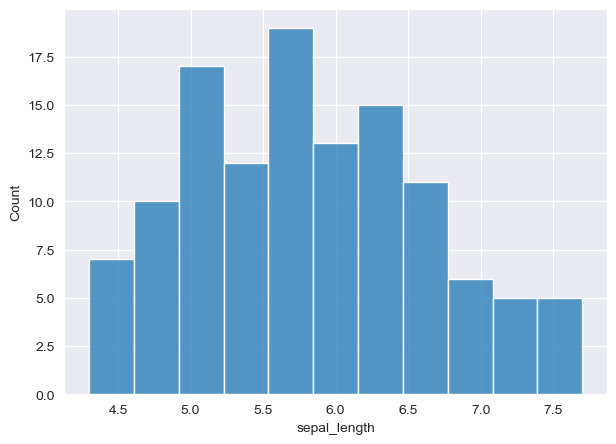

In [15]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df_train, x='sepal_length', bins=11)

Vemos que la distribución de esta variable no es exactamente una [distribución normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal), pero tiene una cierta forma de campana. La mayoría de los valores se encuentran entre 5 y 6.5

#### sepal_width

Veamos ahora como se comporta la variable sepal_width. Veremos en el gráfico debajo que esta variable tiene un comportamiento mucho más similar a una distribución normal.

<Axes: xlabel='sepal_width', ylabel='Count'>

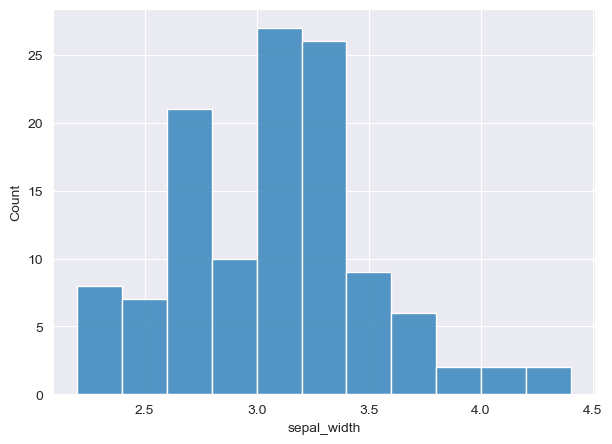

In [18]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df_train, x='sepal_width', bins=11)

#### petal_length

Veamos ahora cómo se comporta la variable petal_length. Esta variable también tiene un componente bastante frecuente en algunas distribuciones, y es que tiene una alta concentración de valores al principio, pero luego se comporta como una distribución normal. 
Veremos al final cómo podemos solucionarlo aplicando una transformación logarítmica.

<Axes: xlabel='petal_length', ylabel='Count'>

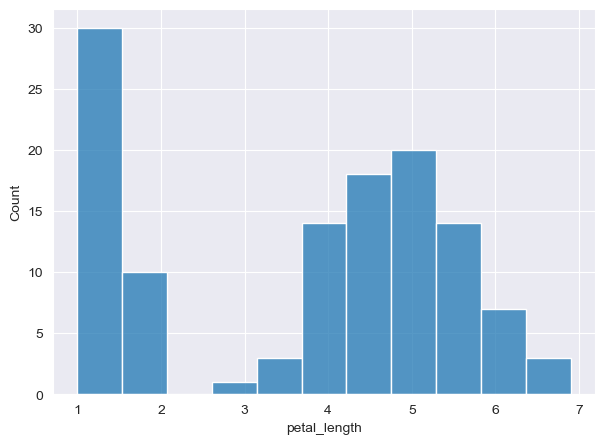

In [20]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df_train, x='petal_length', bins=11)

#### petal_width

Analizamos a continuación el comportamiento de la variable petal_width. Esta variable también tiene un componente bastante frecuente en algunas distribuciones, y, al igual que la variable anterior, también tiene una alta concentración de valores al principio, pero luego se comporta como una distribución normal. 
De igual forma, se verá al final cómo podemos solucionarlo aplicando una transformación logarítmica, aunque probablemente no funcione tan bien como en petal_length

<Axes: xlabel='petal_width', ylabel='Count'>

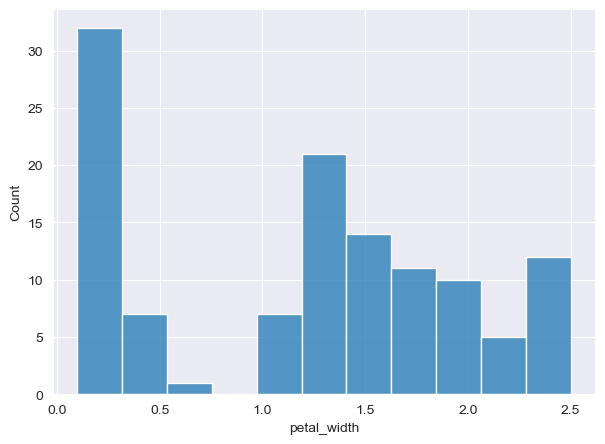

In [21]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df_train, x='petal_width', bins=11)

#### species

Llegamos al apartado más importante de este proceso: el análisis de la clase que queremos intentar predecir. El objetivo de este problema es predecir el tipo de flor en función de las 4 variables que acabamos de estudiar, así que un buen punto de partida será ver cómo se distribuye la variable.

Lo primero que debemos pensar es ¿qué tipo de variable es esta? 
Se trata de una variable **categórica**, por lo que no podemos hacer un histograma como en los casos anteriores. La forma más sencilla de mostrar la distribución de una variable categórica es por **conteo**, por lo que utilizaremos un countplot de Seaborn.

<Axes: xlabel='species', ylabel='count'>

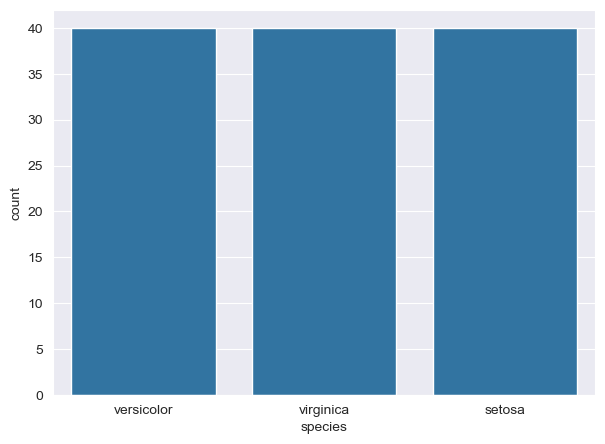

In [22]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df_train, x='species')

A primera vista, da la impresión de que todas las clases tienen la misma representación, que es el caso ideal. En el caso de clases desbalanceadas, tenemos que ver cómo podemos rebalancear las clases para que nuestro modelo pueda aprender lo suficiente de cada clase y no priorizar una sobre otra, o incluso predecir siempre una si el desbalance es muy grande.

Dado que el gráfico puede ser engañoso, se realiza a continuación una pequeña verificación solo para asegurarnos de la distribución.

In [23]:
df_train['species'].value_counts()

species
versicolor    40
virginica     40
setosa        40
Name: count, dtype: int64

## Análisis Bivariante

Una vez se ha comprobado como se comportan los datos por sí mismos, nos interesa ver cómo se comportan los datos en relación a los demás. Como las 4 variables independientes son numéricas, podemos utilizar un "pequeño truco" para graficar rápidamente las relaciones entre todas ellas utilizando un **pairplot** de Seaborn. En la práctica, si hay muchas variables, es posible que antes tengamos que hacer, por ejemplo, un estudio de correlación que nos permita quitar algunas variables irrelevantes, para analizar únicamente las variables relevantes y/o correladas.

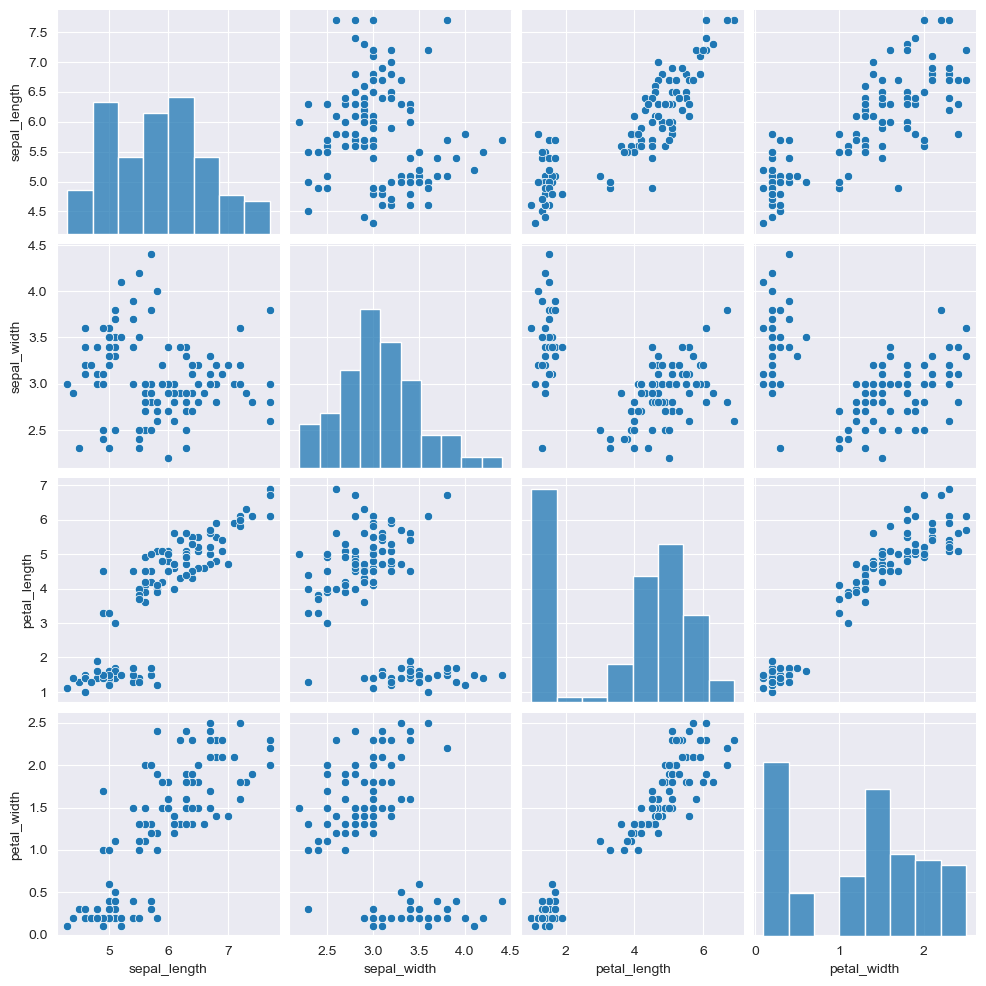

In [25]:
sns.pairplot(df_train)

Vemos que las variables petal_length y petal_width están bastante correlacionadas (el aumento/disminución de una provoca un cambio claro en la otra. En un gráfico esto se traduce en la "alineación" de valores (puntos) sobre una "recta"), y lo mismo se ve para petal_length y sepal_length.

## Análisis Multivariable

Finalmente, podemos introducir una variable más a este proceso, que será la variable a predecir "species". Podemos hacerlo introduciendo un **hue (matiz)** en el pairplot para ver si podemos visualizar rápidamente alguna frontera de separación entre las 3 especies de flores.

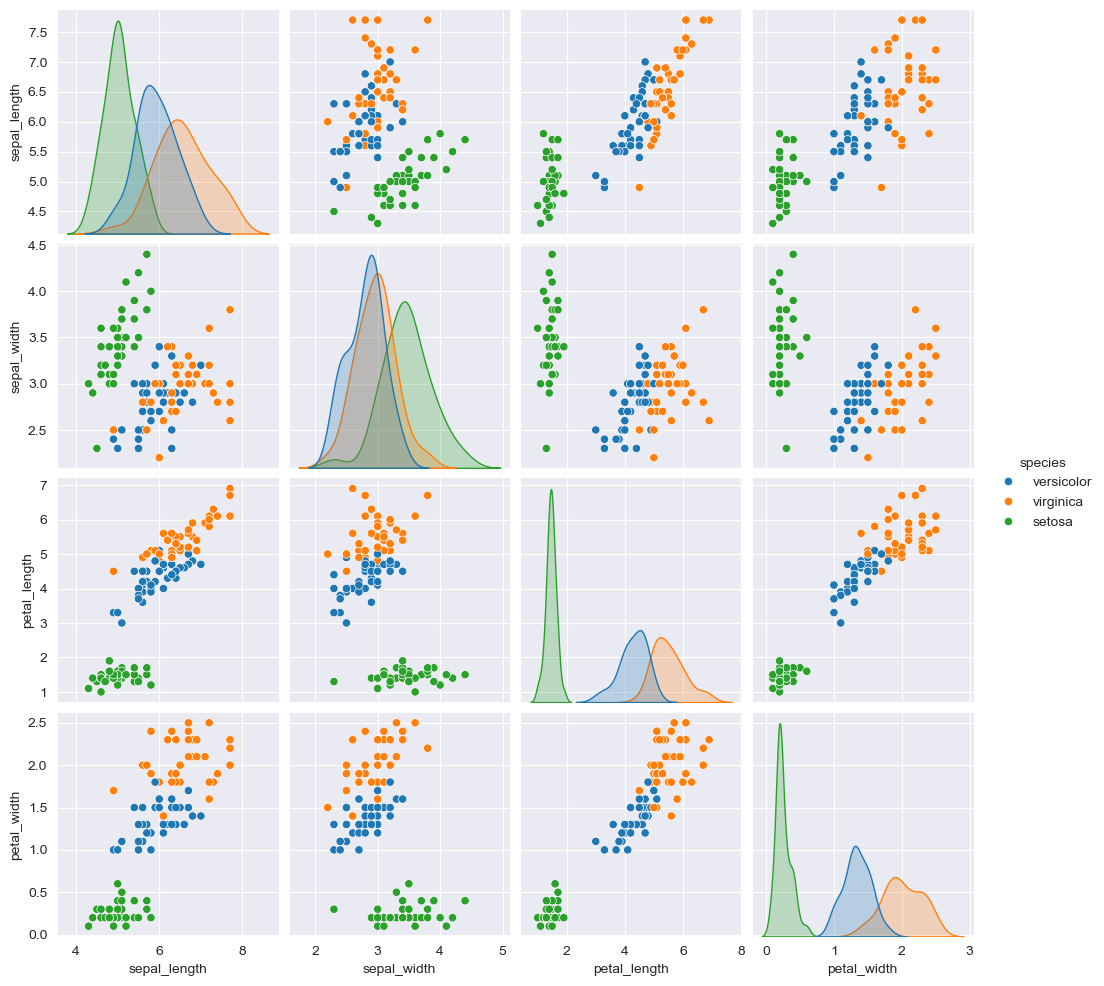

In [26]:
sns.pairplot(df_train, hue='species')

El gráfico que se muestra encima es muy informativo. Vemos que claramente existe una frontera de separación entre los datos, por lo que es probable que nuestro problema se pueda resolver de forma analítica consiguiendo un buen resultado.

## Análisis de correlación

Este análisis siempre es muy importante en las variables numéricas, y sobre todo en los modelos lineales (aunque debemos revisarlo siempre). La multicolinearidad es un gran problema en el cálculo matricial, por lo que debemos evitar a toda costa variables con correlación alta, ya que ello significa que se están introduciendo datos al modelo que luego entrenaremos para resolver el problema que pueden provocar la ineficiencia del mismo.

**NOTA:**
Un modelo de regresión lineal posee un problema de multicolinealidad, cuando existe correlación entre tres o más variables independientes, reduciendo así el poder predictivo de las variables independientes con respecto al modelo. Si la correlación se da entre dos variables independientes, se habla de colinealidad. Por ejemplo: Si se dispone de un modelo de regresión lineal en el que la variable dependiente es el salario actual y las variables independientes sean la edad y los años de experiencia, pero probablemente la edad y los años de experiencia estén asociados; entonces la edad va a proporcionar información para predecir, pero los años de experiencia probablemente también den información que ya pudo haber dado la variable edad. En consecuencia, se está provocando un problema, en este caso de colinealidad, donde el modelo no será adecuado, pues las variables independientes están ofreciendo información redundante.
¿Cómo solucionar el problema de multicolinealidad? Se puede, entre otras medidas, mejorar el diseño muestral extrayendo la información máxima de las variables observadas, eliminando las variables que se sospechen son causantes de multicolinealidad, o en caso de disponer de pocas observaciones, aumentar el tamaño de la muestra.

Algunos errores comunes que se cometen en el análisis de correlación:

- Incluir variables categóricas: La correlación (de Pearson) se calcula como el ratio entre la covarianza entre dos variables y la raíz del producto de sus varianzas. Esto significa que las **variables que utilicemos en el análisis de correlación deberán ser continuas**.
- No definir la escala correcta: La correlación está entre 0 y 1, pero muchas veces cuando graficamos veremos que la escala de colores se ajusta al valor mínimo y máximo de nuestra escala. Es muy poco probable tener dos variables que tengan correlación 0 y 1, y, por lo tanto, la escala variará entre estos dos valores y no entre 0 y 1, esto nos puede llevar a pensar que una diferencia entre dos valores es mayor de lo que es en realidad. Para solucionar esto se suelen imponer los valores máximos y mínimos del mapa de calor.
- Tomar correlación "buena" o "mala" basada en un número arbitrario: Muchas veces veremos declaraciones como "correlación por encima de 0.7 es muy alta" o lo contrario. En la realidad debemos apoyarnos en el gráfico y el valor de la correlación a la vez para poder tomar una decisión más acertada.
- No graficar los valores de la correlación sobre los gráficos en el heatmap: Los valores ayudan a resolver esas diferencias en las que no estamos seguros de si lo que vemos es una correlación muy alta o regular. Para esto le pasaremos al heatmap el parámetro annot=True

<Axes: >

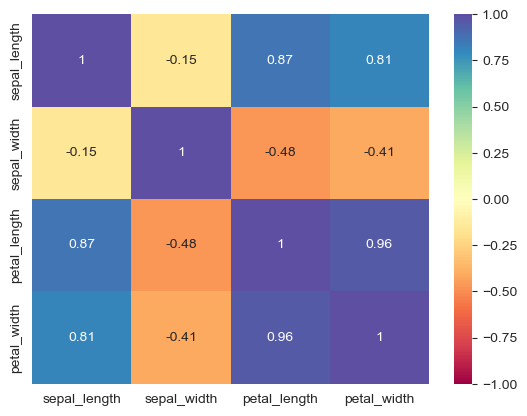

In [38]:
sns.heatmap(df_train.corr(numeric_only=True), vmin=-1, vmax=1, cmap='Spectral', annot=True)

Se ve claramente que la correlación entre petal_length y sepal_length y la de petal_length y petal_width es alta, como habíamos visto en los demás análisis. Esto confirma nuestra teoría. Veamos que pasa con la escala si no aclaramos los valores de vmax y vmin...

<Axes: >

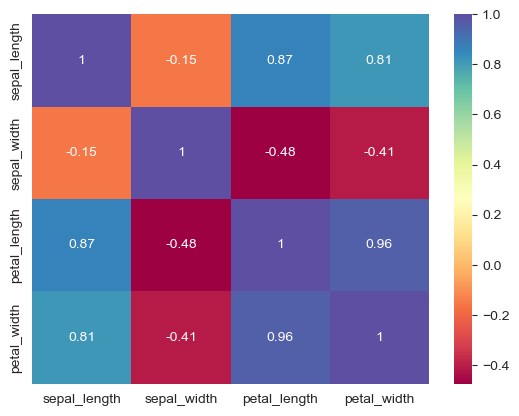

In [37]:
sns.heatmap(df_train.corr(numeric_only=True), cmap='Spectral', annot=True)

Vemos que los colores son más intensos (deberían) porque la escala es más acotada, por lo que el cambio pequeño afecta bastante a la percepción de la diferencia entre los valores de correlación.

## Presentando un modelo

Aún no hemos resuelto el problema de valores numéricos. La clase que queremos predecir tiene valores en texto, y aunque algunos modelos de ML lo permiten, generalmente lo ideal es convertir todas las variables a valores numéricos para aprovechar la computación vectorizada de NumPy. Así que debajo convertimos rápidamente los valores de las 3 clases a números.

In [39]:
df_train['species'].unique()

array(['versicolor', 'virginica', 'setosa'], dtype=object)

In [ ]:
map_target_class = {'setosa': 0, 'versicolor': 1, 'virginica': 2} # Mapeo de las clases a valores numéricos. Se usa un diccionario de Python.

df_train['species_numerical'] = df_train['species'].map(map_target_class) # Creación de una nueva columna con los valores numéricos para el conjunto de train
df_test['species_numerical'] = df_test['species'].map(map_target_class) # Creación de una nueva columna con los valores numéricos para el conjunto de test

df_train.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,species_numerical
56,6.3,3.3,4.7,1.6,versicolor,1
53,5.5,2.3,4.0,1.3,versicolor,1


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train = df_train.drop(['species', 'species_numerical'], axis=1) # Eliminamos la columna 'species' del conjunto de entrenamiento y la columna 'species_numerical' que hemos creado
y_train = df_train['species_numerical'] # Variable objetivo. Es la columna 'species_numerical' que hemos creado
X_test  = df_test.drop(['species', 'species_numerical'], axis=1) # Eliminamos la columna 'species' del conjunto de test y la columna 'species_numerical' que hemos creado
y_test  = df_test['species_numerical'] # Variable objetivo. Es la columna 'species_numerical' que hemos creado

In [ ]:
scaler = StandardScaler() # Normalización de los datos. Usamos StandardScaler para que la media sea 0 y la desviación típica 1.
X_train = scaler.fit_transform(X_train) # Ajustamos el scaler a los datos de entrenamiento y transformamos los datos de entrenamiento
X_test  = scaler.transform(X_test) # Transformamos los datos de test (usando el scaler ajustado a los datos de entrenamiento)

In [ ]:
lr = LogisticRegression(random_state=101, max_iter=1000) # Usamos la regresión logística como modelo de clasificación, definiendo una semilla para la reproducibilidad y aumentando el número máximo de iteraciones
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=101)

In [45]:
preds_train = lr.predict(X_train)
print(confusion_matrix(y_train, preds_train))
print(classification_report(y_train, preds_train))

[[40  0  0]
 [ 0 37  3]
 [ 0  1 39]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.93      0.95        40
           2       0.93      0.97      0.95        40

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120


Vemos que la precisión del resultado es **muy elevada**. Esto es razonable porque ya habíamos visto que es posible obtener una frontera de separación bastante buena simplemente con mirar el problema, por lo que era bastante probable que nuestro algoritmo (a pesar de que aún no sabemos cómo funciona) fuera capaz de devolver un resultado muy bueno.

La pregunta que debemos hacernos es... **¿Hemos terminado?**

Podríamos ver ese resultado y pensar que si, hemos conseguido una precisión muy alta en nuestro modelo, ya está listo para poner en marcha! La verdad es que no, porque sólo hemos validado con el conjunto con el que hemos entrenado el modelo. (Habría que analizar los riesgos del overfitting) Se debe entender que no se ha medido todavía cómo es el desempeño de nuestro modelo con nuevos datos.

Veamos cómo podemos hacer eso debajo...

In [29]:
preds = lr.predict(X_test)
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Oficialmente vemos que nuestro modelo es igual de bueno con datos que jamás ha visto. Por lo que podemos decir que el modelo parece generalizar bien en nuestro dataset. Es importante aclarar que nuestra muestra total es bastante reducida, así que igualmente si esto fuera la vida real seguramente deberíamos probar en otros conjuntos o intentar conseguir más datos para poder dar una apreciación de mayor seguridad.

-----

# Uso de otros recursos

En este proceso vimos algunos recursos de los más típicos para hacer Análisis Exploratorio de Datos, pero hemos visto en la introducción otros recursos que no pudimos mostrar para este dataset. Debajo se detallan algunos de estos procesos para que podamos ver algunas formas de resolverlos.

## Cómo tratar los valores nulos

El manejo de valores nulos suele ser objeto de muchos tutoriales en internet, pero es importante aclarar un par de detalles sobre este proceso. Tenemos dos grandes maneras de lidiar con valores nulos:
- **Eliminando registros:** En este caso tomamos como que la información en los nulos no es relevante para el problema o no podemos ofrecer información útil al modelo si ese valor es nulo, por lo que lo eliminamos. Podemos hacerlo a nivel de registro (eliminando filas que tengan nulos) o a nivel de columna si vemos que una columna tiene una cantidad desproporcionada de valores nulos. Este método tiene una gran desventaja y es que perdemos una fila entera de registros o una columna entera (estamos perdiendo información). Pero tiene una gran ventaja y es que no nos estamos inventando los valores de los registros.

- **Imputando registros:** En este caso haremos lo contrario, suponemos que no queremos perder la información contenida dentro de los registros que contienen valores nulos y decidimos **imputar** un valor al valor nulo, utilizando algún criterio de los que veremos a continuación.
    - **Imputando por algún valor de tendencia central:** El más común es la media o la mediana. Básicamente podemos imputarle el valor medio de la columna a todos los valores nulos de esa columna. Incluso podríamos agrupar por categorías y afinar aún más el valor medio por categoría para imputar. Si quieren ver un ejemplo práctico de esto, pueden verlo [aqui](https://www.kaggle.com/code/micheldc55/tutorial-data-science-matplotlib-y-seaborn).
    - **Imputando con una categoría "unknown":** Muchas veces, cuando tenemos nulos en variables categóricas, una buena opción es imputarle a los nulos de la categoría una "nueva categoría", que podría ser "desconocido", "unkown", etc. La ventaja de esto es que no nos estamos inventando valores, pero la desventaja es que estamos aumentando la dimensionalidad del problema, porque estamos agregando un nuevo valor para el que el modelo deberá aprender su comportamiento.
    - **Imputando un valor conocido:** Esto no es muy frecuente en problemas de Kaggle porque no tenemos conocimiento real del problema, pero en la práctica es posible que podamos solucionar el problema si entendemos por qué se genera ese nulo. Imaginemos que cuando los usuarios ingresan 0 en una variable, por algún problema interno el sistema no procesa este valor y devuelve un valor nulo. Si nosotros supiéramos esto podríamos corregirlo y además tener el valor real que debería ir en esa posición.
    - **Imputando con algún modelo de ML:** Esto suena un poco a resolver Machine Learning con Machine Learning y lo es un poco. En este caso supongamos que tenemos dos columnas en las que detectamos nulos. Lo que haremos será generarnos un modelo que intente predecir el valor de ese nulo en función de los valores de los demás registros que no tienen un nulo en esa posición. **Cuidado!** En este proceso no debemos utilizar la variable objetivo, ya que podríamos incurrir en Data Leakage si después utilizamos los valores predichos para el nulo para predecir la variable. Sklearn tiene un modelo dentro del módulo **impute** para esto, llamado **IterativeImputer**. También nos proveen una clase para cuando queremos rellenar nulos con un valor como la mediana o una constante, llamdo SimpleImputer, pero éste último prefiero hacerlo con el método de pandas .fillna().
    
```python
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

imputer = IterativeImputer()
imputed_df = imputer.fit_tranform(df)
```

Y aunque estoy de acuerdo en que es un proceso de suma importancia, también me parece muy importante aclarar que siempre que imputemos valores nulos estamos **inventado valores**. Obviamente estamos inventando valores tomando una decisión informada con datos, pero generalmente, salvo que quien creó el dataset nos lo diga directamente, nunca sabremos si esos valores nulos están bien imputados o no. Por lo tanto, es un proceso que hay que hacer con **mucho cuidado**.

### Fabricando un ejemplo

Debajo fabricaremos un ejemplo para poder imputar los nulos. Quitaremos 15 valores al azar de 2 columnas y mostraremos cómo podríamos implementar las distintas soluciones que hemos planteado. También tomaremos el ejemplo como oportunidad para discutir las ventajas y desventajas de cada método en cada caso. Veremos:

- Cómo eliminar los datos de toda una columna
- Cómo eliminar las filas con datos faltantes
- Cómo imputar por alguna medida de tendencia central
- Cómo imputar con IterativeImputer

In [30]:
import random
indexes = random.sample(range(120), 15)

for index in indexes:
    if index > 80:
        df_train.iloc[index, 1] = np.nan
    else:
        df_train.iloc[index, 2] = np.nan
        
df_train.iloc[indexes]

,sepal_length,sepal_width,petal_length,petal_width,species,species_numerical
89,5.5,2.5,NaN,1.3,Iris-versicolor,1
5,5.4,NaN,1.7,0.4,Iris-setosa,0
87,6.3,NaN,4.4,1.3,Iris-versicolor,1
24,4.8,3.4,NaN,0.2,Iris-setosa,0
99,5.7,2.8,NaN,1.3,Iris-versicolor,1
61,5.9,NaN,4.2,1.5,Iris-versicolor,1
78,6.0,2.9,NaN,1.5,Iris-versicolor,1
15,5.7,4.4,NaN,0.4,Iris-setosa,0
71,6.1,NaN,4.0,1.3,Iris-versicolor,1
47,4.6,3.2,NaN,0.2,Iris-setosa,0


Debajo mostraremos cómo se implementa cada una de las soluciones:

#### Quitar las columnas que tienen nulos:

Como sabemos que las columnas sepal_width y petal_length son las que tienen, podemos simplemente eliminarlas del DataFrame usando el método .drop(). Notar el axis=1, ya que esto es un error común. En la práctica podemos ver qué columnas tienen valores nulos utilizando el método .info() del DataFrame. 

Éste método no suele ser recomendable cuando hay pocos datos faltantes. Incluso en el caso que tiene más nulos, solamente son 11, por lo que no nos compensa eliminar una columna entera por eso.
```python
df_train.info()
df_train.drop(['sepal_width', 'petal_length'], axis=1)
```
#### Quitar los registros que tienen nulos:

Una opción más razonable podría ser eliminar las filas que en alguno de sus elementos tienen valores nulos. Esto suele ser más razonable porque no necesitamos perder una columna entera, que suele contener más información que una fila. Si la proporción de registros a perder es baja, esto puede ser una buena opción, porque no estamos perdiendo un porcentaje grande del dataset. El problema es que este dataset tiene 150 registros, por lo que no queremos perder ninguno. En este caso, no sería recomendable eliminarlos.
```python
# En este caso no necesitamos el axis=1
df_train.dropna(subset=['sepal_width', 'petal_length'])
```

#### Imputar por la media de la columna:

Ahora si comenzamos con los casos que si pueden ser más riesgosos para el aprendizaje del modelo. Básicamente ahora podemos también imputar los valores de la columna con la media de la columna (o la mediana, o la moda o cualquier estadístico de tendencia central). En este caso, nos estamos inventando información y además ya hemos visto que los valores son muy dependientes a las "especies". **Pregunta al lector:** ¿Por que entonces no rellenamos con la media de la columna, pero agrupada por especie? Pueden dejar su opinión en los comentarios.

```python
media_sepal = df_train['sepal_width'].mean()
media_petal = df_train['petal_length'].mean()

df_train.loc[df_train['sepal_width'].isna(), 'sepal_width'] = media_sepal
df_train.loc[df_train['petal_length'].isna(), 'petal_length'] = media_petal
```

#### Imputar con IterativeImputer:

Muchas veces, salvo que tengamos conocimiento muy profundo de producto, no podremos imputar estos nulos con la media o mediana, salvo que en el EDA veamos una relación muy clara de dependencia entre categorías y podamos agrupar por ellas. En casos de desesperación, podemos pedirle a sklearn que impute los valores nulos. Si les interesa saber cómo funciona esta herramienta de sklearn, pueden leerlo en detalle [aqui](https://towardsdatascience.com/a-better-way-to-handle-missing-values-in-your-dataset-using-iterativeimputer-9e6e84857d98#05b9).

En pocas palabras, lo que hace este proceso es comenzar seleccionando las columnas en base a un orden establecido, que es un input de la clase (por defecto ascendente, de la columan que tiene menos nulos a la que tiene más). Luego, se sustituya en la primera columna los nulos por la media de la columna. Luego el proceso iterativo entrena un modelo de ML (que podemos elegir) con todos los demás registros e imputa la predicción del modelo, y lo hace para cada uno de los features. Esto sigue hasta que se cumpla el número de iteraciones o se verifique una cierta condición, que se explica en el artículo. Para usar este modelo solo debemos:

```python
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
imputer.fit_transform(df_train)
```


## Caso especial de reducción de dimensionalidad: PCA

### Qué es la reducción de la dimensionalidad?

Muchas veces pensamos que cuanta más información le demos al modelo, mejor funcionará, pero este pensamiento suele ser problemático. Imaginemos que tenemos datos como los que se ven en el diagrama debajo. Cuantas variables estamos graficando en este caso? Veremos que en este ejemplo claramente sobran 2 variables, y esto es porque nuestro problema parece tener dependencia lineal con la variable sobre la que está definido el plano. Básicamente podemos convertir esta problema en un problema de 2 dimensiones sin perder 

<img src="./img/PCA.png" width="600px" height="500px">
<img src="./img/PCA2.png" width="600px" height="500px">

Generalmente, veremos que intentaremos reducir la dimensionalidad del problema principalmente para solucionar dos problemas, uno de separabilidad de variables y/o visualización, y otro de computación. Cuando reducimos la dimensionalidad del problema podemos llegar a reducirlo a 2 o 3 variables y por lo tanto podremos **visualizar** el problema. Esto es clave, porque muchas veces veremos que un problema de varias dimensiones se puede reducir a 2 o 3 y conservar gran parte de la separación de las clases del problema. Esto nos permitirá visualimente entender nuestro problema entero, como una representación de 2 o 3 variables, en lugar de 10 (por ejemplo). 

El otro problema es de poder de cómputo, tanto del entrenamiento del modelo como de su puesta en producción. Si tenemos un modelo que tiene 20 variables para predecir una, el modelo se está entrenando recibiendo instancias de 20 elementos y llevando a cabo las operaciones que correspondan según el modelo que sea. Esto implica que el modelo deberá entrenarse en N x m dimensiones, donde N es la cantidad de registros y m la cantidad de variables (en este caso 10). Si utilizamos técnicas de reducción de dimensionalidad y llevamos el problema a uno de N x m', donde m' es la cantidad de variables reducida (generalmente 2 o a lo sumo 3), hemos reducido la cantidad de instancias que el modelo debe calcular en m'/m. Esto hace que nuestro problema sea más eficiente en términos de coste computacional (necesita menos poder de procesamiento para entrenarse).

En este proceso se identifican y eliminan las variables irrelevantes (o poco relevantes), reduciendo el ruido del dataset original. El mejor modelo que podemos alcanzar no es el que tiene en cuenta más variables, sino aquel que incluye la mayor cantidad de información de calidad.

### Técnicas de reducción de dimensionalidad:

Selección de variables: filtrar las variables de baja varianza, pruebas estadísticas univariadas (pruebas de dependencia), eliminación de características de forma recursiva, random forests, ratio de valores faltantes, filtrar aquellas variables de alta correlación, etc.

#### Técnicas matemáticas de reducción de dimensionalidad:

A pesar de poder reducir la dimensionalidad quitando o agregando columnas, muchas veces nuestras variables aportan poca información pero nos interesa contemplarlas. Para esto también existen técnicas que nos permiten tomar nuestro espacio de variables y convertirlo a un subespacio de componentes que intentan mantener alguna propiedad del espacio inicial. Esto puede ser la varianza, la distancia punto a punto, etc. Si os interesa [aqui](https://es.wikipedia.org/wiki/Reducci%C3%B3n_de_dimensionalidad) se comentan los métodos más usados en reducción de dimensionalidad.

- Lineal: análisis factorial, análisis de componentes principales (PCA), análisis de discriminante lineal.

- No lineal: escala multidimensional, t-SNE, mapeo de características isométricas (ISOMAP), aproximación y proyección de colector uniforme (UMAP)

Veamos cómo sería la aplicación de un método lineal, como el PCA para este caso. Tenemos 4 variables, por lo que no podemos visualizar directamente las 4 variables para identificar posibles patrones entre todas ellas. Intentaremos utilizar la técnica de Análisis de Componentes Principales para obtener una proyección en 2 componentes que intentan capturar la mayor parte de la varianza de las 4 variables iniciales.

El PCA utiliza los valores propios de la matriz que pasamos como input, y crea su descomposición en vectores propios. Cuando seleccionamos el número de variables que queremos tener en cuenta (n_components=2 en este caso) estamos diciéndole al modelo que queremos conservar los dos primeros vectores propios y proyectar nuestros datos (de 4 dimensiones) en estas dos direcciones. Esto

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.72646491 0.23006439]
0.9565292921584864


Vemos que el 96% de la varianza del problema puede ser explicado por estas dos nuevas variables que son combinación lineal de las 4 variables del problema.

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

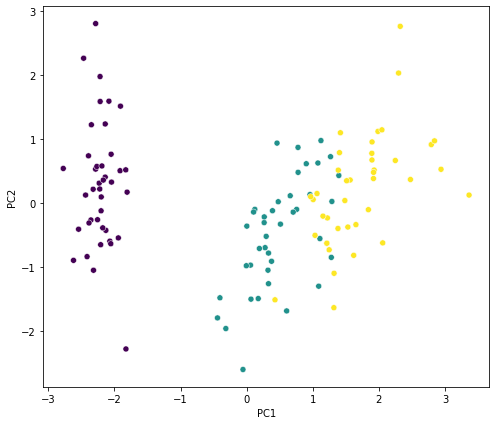

In [33]:
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y_train

plt.figure(figsize=(8, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', c=y_train, palette='tab10')

Vemos una clara separación entre los 3 clusters incluso habiendo reducido el problema a dos variables. Se puede aproximar incluso más utilizando otras técnicas, pero con estas nuevas variables ya podríamos hacer un modelo y compararlo con el anterior! Debajo vemos la comparativa y los resultados son muy buenos. Pensar que estamos perdiendo la mitad de los datos y aún así estamos conservando un score muy alto!

In [34]:
lr = LogisticRegression(random_state=101, max_iter=1000)
lr.fit(X_pca, y_train)
train_preds = lr.predict(X_pca)
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.87      0.85      0.86        40
           2       0.85      0.88      0.86        40

    accuracy                           0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120


In [35]:
X_test_pca = pca.transform(X_test)

test_predictions = lr.predict(X_test_pca)
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.80      0.89        10
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30


#### Veamos qué sucede con la varianza explicada a medida que aumenta la cantidad de variables que utilizamos...

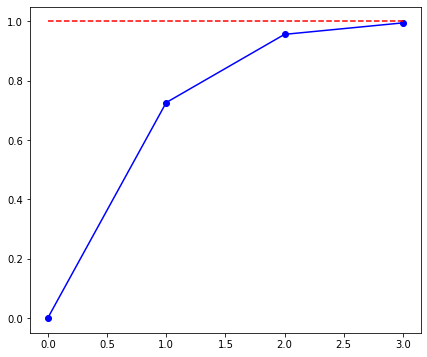

In [36]:
expl_var = [0]

for n_components in [1, 2, 3]:
    var_pca = PCA(n_components=n_components)
    X_pca_n = var_pca.fit_transform(X_train)
    expl_var.append(sum(var_pca.explained_variance_ratio_))
    
plt.figure(figsize=(7, 6))
plt.plot([0, 1, 2, 3], expl_var, 'bo-')
plt.plot([0, 3], [1, 1], 'r--')

# Ejercicio

Utilizando el dataset de [PUBG (videojuego online de disparos)](https://www.kaggle.com/competitions/pubg-finish-placement-prediction/data), realizar un EDA (en otro notebook). Seguir los siguientes pasos:
- Elegir 7 variables de interés y filtrar el dataframe
- Utilizar el método describe e info para generar una idea general de los datos
- Hay valores nulos? Si hay, qué haría con ellos?
- Hay valores duplicados? Si hay, tienen sentido o sería más razonable eliminarlos?
- Visualizar las 7 variables en distribución o conteos, alguna cosa llama la atención?
- Realizar el análisis bivariable para las variables numéricas.
- Elegir 3 variables y visualizarlas en un único gráfico
- Estudiar la correlación entre variables. Defender si es razonable quitar alguna variable